## **Homework 2** Problem 3

In this assignment, you will try to implement CycleGAN to do style transform. 

### (a) Installation

Install the CycleGAN package from the official GitHub repository.

In [7]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2428, done.
remote: Total 2428 (delta 0), reused 0 (delta 0), pack-reused 2428
Receiving objects: 100% (2428/2428), 8.13 MiB | 28.70 MiB/s, done.
Resolving deltas: 100% (1561/1561), done.


In [8]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [9]:
!pip install -r requirements.txt

Download the official zebra2horse dataset.

In [10]:
!bash ./datasets/download_cyclegan_dataset.sh horse2zebra

Specified [horse2zebra]
for details.

--2021-10-28 04:12:23--  http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/horse2zebra.zip
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116867962 (111M) [application/zip]
Saving to: ‘./datasets/horse2zebra.zip’

./datasets/horse2ze 100%[===================>] 111.45M  1.79MB/s    in 1m 42s  

2021-10-28 04:14:04 (1.10 MB/s) - ‘./datasets/horse2zebra.zip’ saved [116867962/116867962]

Archive:  ./datasets/horse2zebra.zip
   creating: ./datasets/horse2zebra/trainA/
  inflating: ./datasets/horse2zebra/trainA/n02381460_6223.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1567.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_3354.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_299.jpg  
  inflating: ./datasets/horse2zebra/t

### (b) Train CycleGAN

Train CycleGAN for about 5 epochs. Not necessary to finish training since it may cost a long time. Test your trained model and visualize some results.

Note: Use `latest_net_G_A.pth` if you want to transform images from class A to class B and `latest_net_G_B.pth` if you want to transform images from class B to class A.


In [11]:
!python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/horse2zebra        	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

### (c) Infer from Pre-trained Model

Download one of the official pretrained models.


In [15]:
!bash ./scripts/download_cyclegan_model.sh horse2zebra  # or zebra2horse

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [horse2zebra]
for details.

--2021-10-28 04:50:38--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/horse2zebra.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/horse2zebra_pretrained/latest_net_G.pth’

./checkpoints/horse 100%[===================>]  43.46M  1.43MB/s    in 26s     

2021-10-28 04:51:04 (1.65 MB/s) - ‘./checkpoints/horse2zebra_pretrained/latest_net_G.pth’ saved [45575747/45575747]



In [16]:
!bash ./scripts/download_cyclegan_model.sh zebra2horse 

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [zebra2horse]
for details.

--2021-10-28 04:51:06--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/zebra2horse.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/zebra2horse_pretrained/latest_net_G.pth’

./checkpoints/zebra 100%[===================>]  43.46M  1.23MB/s    in 42s     

2021-10-28 04:51:49 (1.02 MB/s) - ‘./checkpoints/zebra2horse_pretrained/latest_net_G.pth’ saved [45575747/45575747]



In [17]:
!ls -l ./checkpoints/horse2zebra_pretrained/

total 44508
-rw-r--r-- 1 root root 45575747 Jul 24  2018 latest_net_G.pth


Or copy your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [ ]:
!cp ./checkpoints/horse2zebra_pretrained/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth

Test the style transform.

Note: Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.


###Pre-Trained horse2zebra

In [18]:
!python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/horse2zebra/testA    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

Visualize your results.

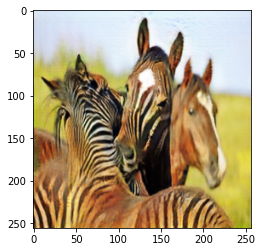

In [19]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_1010_fake.png')
plt.imshow(img)

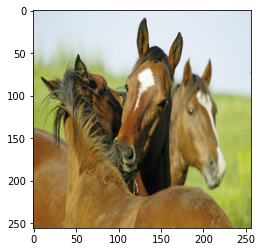

In [20]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_1010_real.png')
plt.imshow(img)

###Pre-Trained zebra2horse

In [56]:
!python test.py --dataroot datasets/DownloadZebra --name zebra2horse_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/DownloadZebra        	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

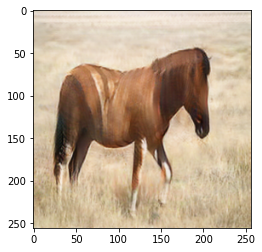

In [62]:
import matplotlib.pyplot as plt

img = plt.imread('./results/zebra2horse_pretrained/test_latest/images/zebra3_fake.png')
plt.imshow(img)

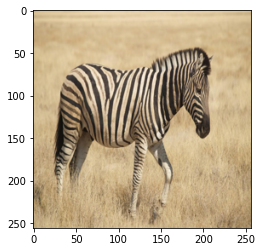

In [63]:
import matplotlib.pyplot as plt

img = plt.imread('./results/zebra2horse_pretrained/test_latest/images/zebra3_real.png')
plt.imshow(img)

Try your customized images.

###Self-Trained Model

In [51]:
!python test.py --dataroot datasets/DownloadHorse --name horse2zebra --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/DownloadHorse        	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

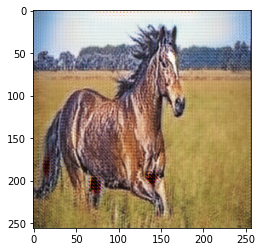

In [54]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra/test_latest/images/horse1_fake.png')
plt.imshow(img)

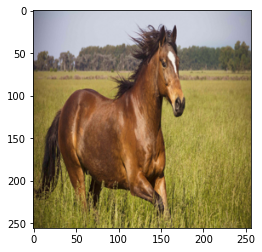

In [55]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra/test_latest/images/horse1_real.png')
plt.imshow(img)

### Pre-Trained Model with images from the internet 

In [29]:
!python test.py --dataroot datasets/DownloadHorse --name horse2zebra_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/DownloadHorse        	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

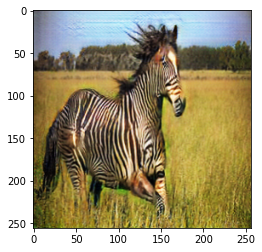

In [48]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/horse1_fake.png')
plt.imshow(img)

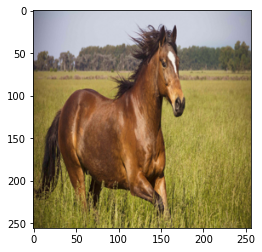

In [49]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/horse1_real.png')
plt.imshow(img)

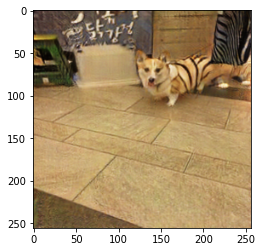

In [31]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/corgi_fake.png')
plt.imshow(img)

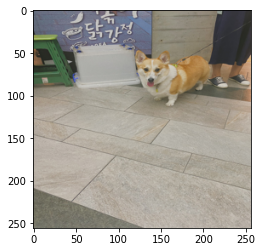

In [32]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/corgi_real.png')
plt.imshow(img)

### (d) Implement on Another Dataset with images from the internet

In [33]:
!bash ./scripts/download_cyclegan_model.sh apple2orange

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [apple2orange]
for details.

--2021-10-28 05:03:08--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/apple2orange.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/apple2orange_pretrained/latest_net_G.pth’

./checkpoints/apple 100%[===================>]  43.46M  2.09MB/s    in 21s     

2021-10-28 05:03:29 (2.03 MB/s) - ‘./checkpoints/apple2orange_pretrained/latest_net_G.pth’ saved [45575747/45575747]



In [34]:
!python test.py --dataroot datasets/DownloadApple --name apple2orange_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/DownloadApple        	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

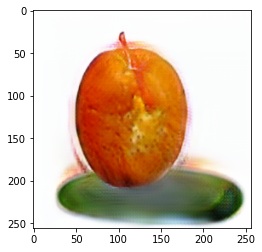

In [45]:
import matplotlib.pyplot as plt

img = plt.imread('./results/apple2orange_pretrained/test_latest/images/apple2_fake.png')
plt.imshow(img)

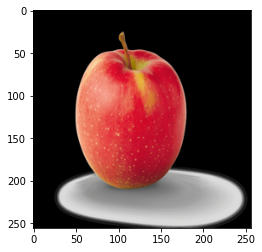

In [46]:
import matplotlib.pyplot as plt

img = plt.imread('./results/apple2orange_pretrained/test_latest/images/apple2_real.png')
plt.imshow(img)

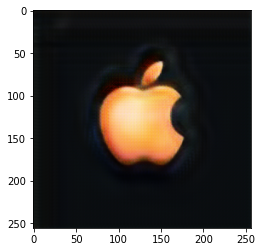

In [44]:
import matplotlib.pyplot as plt

img = plt.imread('./results/apple2orange_pretrained/test_latest/images/apple4_fake.png')
plt.imshow(img)

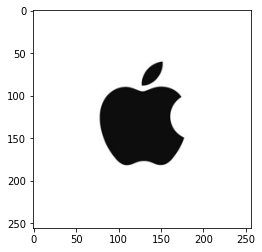

In [47]:
import matplotlib.pyplot as plt

img = plt.imread('./results/apple2orange_pretrained/test_latest/images/apple4_real.png')
plt.imshow(img)